# Plotting nicer graphs
* For plotting nicer plot we use plt.imshow().
* First we convert the unstructured data to mesh grid then use plt.imshow()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # interpolation
from mpl_toolkits.mplot3d import Axes3D # for 3D if needed
from matplotlib import cm # colormap

In [2]:
# Loading solution
# Link: https://github.com/lululxvi/deepxde/issues/17
# In test.dat, the first column is x coordinate, the second column is y coordinate, the 3rd column is y_true, the 4th column is y_pred.

data = np.genfromtxt('test.dat')
nodes_deepxde, y_pred = data[:,0:2], data[:,2]

In [3]:
print(np.shape(nodes_deepxde), np.shape(y_pred))
#print((nodes_deepxde), (y_pred))

(2900, 2) (2900,)


In [4]:
# Loading loss
loss_data = np.genfromtxt('loss.dat')
print(np.shape(loss_data))

# iterations
print(loss_data[:,0])

(31, 11)
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000.
 30000.]


In [5]:
# out of 11 columns
# columns 1 : iterations
# 4 BCs *2 for train and test = 8 columns
# 1 PDE*2 for train and test = 2 columns
# total 11 columns
# we can ignore the test data i.e. last 5 columns
steps_number, BC1, BC2, BC3, BC4, PDE = loss_data[:,0], loss_data[:,1], loss_data[:,2], loss_data[:,3], loss_data[:,4], loss_data[:,5]

In [6]:
BC_loss_array = BC1 + BC2 + BC3 + BC4
PDE_loss_array = PDE
total_loss_array = BC1 + BC2 + BC3 + BC4 + PDE
best_u_pred = y_pred

In [7]:
# Loading exact results
exact_data = np.load('final_data.npz') # load true solution
keys = list(exact_data.keys()) # all keys in the dictionary
print(keys)

['nodes', 'temperature', 'boundary_nodal_coordinates', 'boundary_solution']


In [8]:
nodes = exact_data[keys[0]] # nodal coordinates
temperature = exact_data[keys[1]] # nodal temperature
nodes = nodes[:,[0,2]]
print(np.shape(nodes))
print(np.shape(temperature))

(5800, 2)
(5800, 1)


## Plot loss

In [9]:
# plt.figure(1,dpi=300)
# iter_array = steps_number
# plt.plot(iter_array,test_error_array)
# plt.plot([best_iter,best_iter],[0,best_error_vec],'o-k')
# plt.xlabel('Epoch')
# plt.ylabel('Validation Error')
# # See this post how to remove the legend lines: https://stackoverflow.com/questions/25123127/how-do-you-just-show-the-text-label-in-plot-legend-e-g-remove-a-labels-line
# plt.legend(['Best iteration: '+str(best_iter),'Best error: ' +str(best_error_vec)],handlelength=0, handletextpad=0, fancybox=True,markerscale=0)

# plt.ylim(bottom=0)  # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.ylim.html
# #plt.savefig('Test_error_'+str(max_iter)+'_iteration.jpg',dpi=150)

## Loss curve


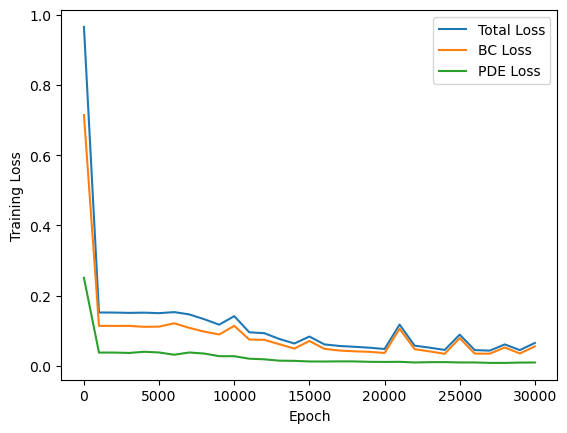

In [10]:
plt.figure(2, dpi=100)

iter_array = steps_number
plt.plot(iter_array, total_loss_array)
plt.plot(iter_array, BC_loss_array)
plt.plot(iter_array, PDE_loss_array)
plt.legend(['Total Loss','BC Loss','PDE Loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.savefig('plots/loss_'+str(steps_number[-1])+'_iteration.jpg',dpi=500)

## Some values

In [11]:
ub = nodes.max(axis=0)
lb = nodes.min(axis=0)
print(ub)
print(lb)
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

[0.5 1. ]
[-0.5  0. ]


## Ground truth

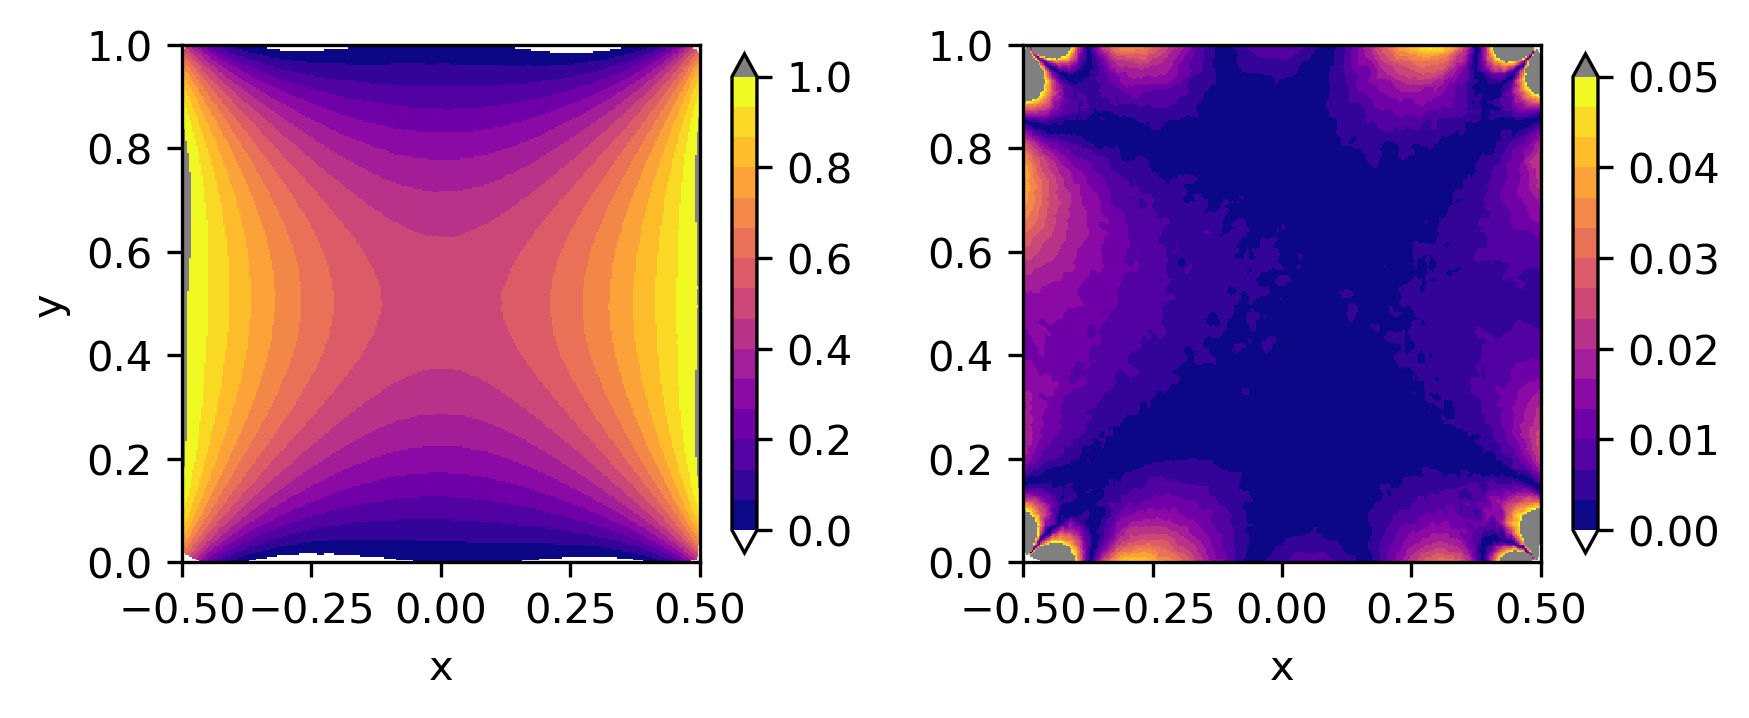

In [32]:
fig, ax = plt.subplots(1, 2,dpi=300)
#ax = fig.add_subplot(111)#, projection='3d')
# deepxde result
data_deepxde = griddata(nodes_deepxde, best_u_pred.flatten(), (X, Y), method='cubic')
sc1 = ax[0].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1.0)

n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

# absolute pointwise difference
data_difference = griddata(nodes, temperature.flatten(), (X, Y), method='linear')
sc2 = ax[1].imshow(abs(data_difference-data_deepxde), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

#sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature,s=3, cmap=cm.jet)
#plt.colorbar(sc)
ax[0].set(xlabel='x', ylabel='y')
ax[1].set(xlabel='x', ylabel='')
#fig.tight_layout()
# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)


#fig.colorbar(sc1, ax=ax.ravel().tolist(),shrink=0.5)
fig.colorbar(sc1, ax=ax[0],shrink=0.45, extend="both")
fig.colorbar(sc2, ax=ax[1],shrink=0.45, extend="both")
#fig.supxlabel('(b) Model 2',y=0.15)#, fontsize=5)


#fig.tight_layout()
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
plt.savefig('plots/solutions.jpg', dpi = 500,bbox_inches='tight',transparent=True)
# https://stackoverflow.com/a/63076575/14598633

In [13]:

# Since the size of true values and predicted values are not same we will use RBF from scipy to calculate the absolute pointwise error
from scipy.interpolate import Rbf
# Since the size of true values and predicted values are not same we will use RBF from scipy to calculate the absolute pointwise error
from scipy.interpolate import Rbf
#new_nodes = np.hstack([x[:,None], y[:,None]])

# RBF is not working because of repeting entries
# this line will sort unique x and y coordinates from the numpy array
# https://stackoverflow.com/a/66113512/14598633 


In [14]:
data_deepxde.shape, data_difference.shape
# The data_deepxde contains nan values so we will avoid those points in both arrays

((300, 300), (300, 300))

In [15]:
new_true_data = data_difference.flatten()
new_predicted_data = data_deepxde.flatten()
new_true_data.shape, new_predicted_data.shape

((90000,), (90000,))

In [16]:
# to ignore nan values
# https://stackoverflow.com/a/37750034/14598633
new_true_data = np.ma.array(new_true_data , mask=np.isnan(new_true_data)) # Use a mask to mark the NaNs
new_predicted_data = np.ma.array(new_predicted_data , mask=np.isnan(new_predicted_data)) # Use a mask to mark the NaNs

In [17]:
(np.isnan(new_predicted_data ))

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=True)

In [18]:
abs(new_true_data-new_predicted_data)

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20)

In [19]:
rel_l2_norm_of_error = np.linalg.norm(abs(new_true_data-new_predicted_data),2)/np.linalg.norm(new_true_data,2)
rel_l2_norm_of_error

0.05285052987681161

In [20]:
nodes_deepxde.shape

(2900, 2)

In [21]:
indices = np.unique(nodes_deepxde[:,0], axis=0, return_index=True)[1]
indices.shape

(2503,)

In [22]:
# saving unique entries to a new array
nodes_x = nodes_deepxde[indices,0]
nodes_y = nodes_deepxde[indices,1]
temperature_new = y_pred[indices]

In [23]:
# uncomment this to compute RBF. It takes long time
rbfi = Rbf(nodes_x, nodes_y,temperature_new) # predicted solution interpolator
temperature_di = rbfi(nodes[:,0], nodes[:,1]) # 1d array: interpolating to y_true coordinates

In [24]:
rel_l2_norm_of_error = np.linalg.norm(temperature-temperature_di,2)/np.linalg.norm(temperature,2)
rel_l2_norm_of_error

38.202716559110144

## Best PINN prediction

In [25]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')
# n_points = 1000
# # Intepolation points
# x = np.linspace(lb[0], ub[0], n_points)
# y = np.linspace(lb[1], ub[1], n_points)
# # Create meshgrid
# X, Y = np.meshgrid(x,y)
# new_data = griddata(nodes_deepxde, best_u_pred.flatten(), (X, Y), method='linear')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
#                   origin='lower', aspect='equal',vmin=0, vmax=1)

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
# plt.colorbar(sc)
# sc.cmap.set_under('k')
# sc.cmap.set_over('k')
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

## Final PINN prediction

In [26]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')
# new_data = griddata(nodes, final_u_pred.flatten(), (X, Y), method='linear')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
#                   origin='lower', aspect='equal',vmin=0, vmax=1)

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
# plt.colorbar(sc)
# sc.cmap.set_under('k')
# sc.cmap.set_over('k')
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('Iteration_'+str(max_iter)+'Final_PINN_predicted.jpg', dpi = 200)

## Absolute best model error

In [27]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')

# new_data = griddata(nodes, abs(best_u_pred.flatten()-temperature.flatten()), (X, Y), method='linear')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
#                   origin='lower', aspect='equal')

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = abs(best_u_pred-temperature), cmap=cm.jet)
# plt.colorbar(sc)
# #sc.cmap.set_under('k')
# #sc.cmap.set_over('k')
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('iteration_'+str(max_iter)+'_best_absolute-error.jpg', dpi = 200)

## Absolute final model error

In [28]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')

# new_data = griddata(nodes, abs(final_u_pred.flatten()-temperature.flatten()), (X, Y), method='linear')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
#                   origin='lower', aspect='equal')

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = abs(best_u_pred-temperature), cmap=cm.jet)
# plt.colorbar(sc)
# #sc.cmap.set_under('k')
# #sc.cmap.set_over('k')
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('iteration_'+str(max_iter)+'_final_absolute-error.jpg', dpi = 200)